# Import các thư viện và load data

Notebook <br>
Họ và tên: Trần Ngọc Hướng <br>
Mssv: 19021297 <br>
Học phần Học máy <br>

Import thư viện

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline
import matplotlib as mp 
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

Loading data

In [2]:
train_data = pd.read_csv('/kaggle/input/quora-insincere-questions-classification/train.csv')
test_data = pd.read_csv('/kaggle/input/quora-insincere-questions-classification/test.csv')
print("train_data",train_data.shape)
print("test_data",test_data.shape)

train_data (1306122, 3)
test_data (375806, 2)


# Phân tích dữ liệu

In ra một vài dữ liệu ở tập huấn luyện

In [3]:
train_data.head(5)

,qid,question_text,target
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0


In [4]:
train_data.target.value_counts()

0    1225312
1      80810
Name: target, dtype: int64

Biểu đồ target 0 và 1

<AxesSubplot:xlabel='target', ylabel='count'>

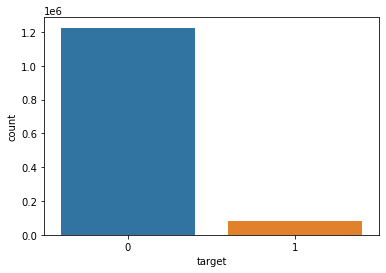

In [5]:
sns.countplot(data=train_data, x='target')

In ra một vài dữ liệu ở tập train

In [6]:
test_data.head(5)

,qid,question_text
0,0000163e3ea7c7a74cd7,Why do so many women become so rude and arroga...
1,00002bd4fb5d505b9161,When should I apply for RV college of engineer...
2,00007756b4a147d2b0b3,What is it really like to be a nurse practitio...
3,000086e4b7e1c7146103,Who are entrepreneurs?
4,0000c4c3fbe8785a3090,Is education really making good people nowadays?


In ra một vài câu hỏi chân thành và không chân thành

In [7]:
print(train_data['question_text'][(train_data['target']==0)].sample(5).values)

['What are the differences between sufficiency and effectiveness?'
 'What are some ways for a college student to earn money to get some financial support?'
 'How do I get Yojana magazines (Telugu) subscription?'
 "What does it mean when my husband says he doesn't owe me anything.?"
 'What will be the upcoming trends of the Gunshot Detection Systems?']


In [8]:
print(train_data['question_text'][(train_data['target']==1)].sample(5).values)

['Dr. Rafael Espinanzo, entrusted with Michelle Obama’s care during 2008 presidential election, is speaking out. “I Know what I saw. Michelle Obama is not a woman who used to be a man. Michelle Obama is just a man with breast implants "?'
 'What do I do I saw my sisters tits and I got hard but I didn’t see her pussy and now I really want to see her pussy seeing her tits got me hard?'
 'How does Jews feel about taking Palestinians’ land by force?'
 "How do I track someone's location without having to add anything on their phone?"
 "Why do Singaporeans who claim the Worker's Party can do a much better job than the PAP don't usually have an elite overseas education?"]


Vẽ word cloud trực quan hóa dữ liệu

Các từ thường xuất hiện trong những câu hỏi không chân thành


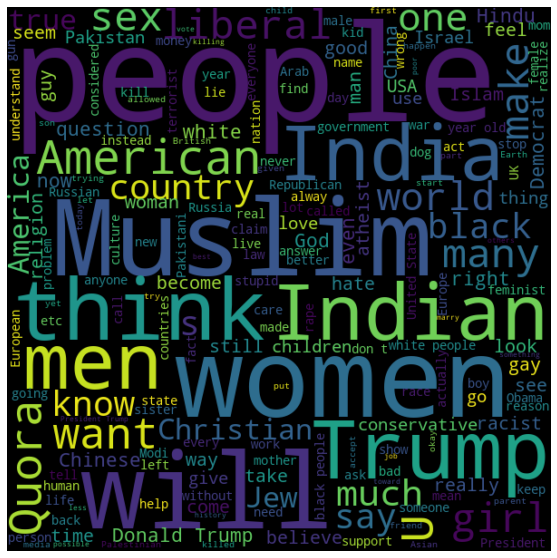

In [9]:
print("Các từ thường xuất hiện trong những câu hỏi không chân thành")
insincere_ques_text =" ".join(train_data[train_data["target"] == 1]["question_text"])
# Create the wordcloud object
wordcloud = WordCloud(width=600, height=600, margin=0).generate(insincere_ques_text)
# Display the generated image:
fig,ax = plt.subplots(1,1,figsize=(10,10))
ax.imshow(wordcloud, interpolation='bilinear')
ax.axis("off")
ax.margins(x = 0, y = 0)
plt.show() 

### Xử lý dữ liệu

In [10]:
import nltk
import sys
import spacy
import string
from unidecode import unidecode
import re
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

In [11]:
#Hàm chuyển chữ viết tắt thành chữ thường
contraction_mapping = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not", "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not", "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",  "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would", "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would", "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam", "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have", "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock", "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have", "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is", "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as", "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would", "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have", "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have", "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are", "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",  "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is", "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have", "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have", "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all", "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have","you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have", "you're": "you are", "you've": "you have" }
def clean_contractions(text, mapping):
    specials = ["’", "‘", "´", "`"]
    for s in specials:
        text = text.replace(s, "'")
    text = ' '.join([mapping[t] if t in mapping else t for t in text.split(" ")])
    return text

In [12]:
#nguồn: https://www.kaggle.com/canming/ensemble-mean-iii-64-36
#Hàm clean tag toán học (math) và URL
def clean_tag(text):
    if '[math]' in text:
        text = re.sub('\[math\].*?math\]', '[formula]', text)
    if 'http' in text or 'www' in text:
        text = re.sub('(?:(?:https?|ftp):\/\/)?[\w/\-?=%.]+\.[\w/\-?=%.]+', '[url]', text)
    return text

In [13]:
#Dấu và các ký tự đặc biệt
puncts=[',', '.', '"', ':', ')', '(', '-', '!', '?', '|', ';', "'", '$', '&', '/', '[', ']', '>', '%', '=', '#', '*', '+', '\\', 
        '•', '~', '@', '£', '·', '_', '{', '}', '©', '^', '®', '`', '<', '→', '°', '€', '™', '›', '♥', '←', '×', '§', '″', '′', 
        '█', '…', '“', '★', '”', '–', '●', '►', '−', '¢', '¬', '░', '¡', '¶', '↑', '±', '¿', '▾', '═', '¦', '║', '―', '¥', '▓', 
        '—', '‹', '─', '▒', '：', '⊕', '▼', '▪', '†', '■', '’', '▀', '¨', '▄', '♫', '☆', '¯', '♦', '¤', '▲', '¸', '⋅', '‘', '∞', 
        '∙', '）', '↓', '、', '│', '（', '»', '，', '♪', '╩', '╚', '・', '╦', '╣', '╔', '╗', '▬', '❤', '≤', '‡', '√', '◄', '━', 
        '⇒', '▶', '≥', '╝', '♡', '◊', '。', '✈', '≡', '☺', '✔', '↵', '≈', '✓', '♣', '☎', '℃', '◦', '└', '‟', '～', '！', '○', 
        '◆', '№', '♠', '▌', '✿', '▸', '⁄', '□', '❖', '✦', '．', '÷', '｜', '┃', '／', '￥', '╠', '↩', '✭', '▐', '☼', '☻', '┐', 
        '├', '«', '∼', '┌', '℉', '☮', '฿', '≦', '♬', '✧', '〉', '－', '⌂', '✖', '･', '◕', '※', '‖', '◀', '‰', '\x97', '↺', 
        '∆', '┘', '┬', '╬', '،', '⌘', '⊂', '＞', '〈', '⎙', '？', '☠', '⇐', '▫', '∗', '∈', '≠', '♀', '♔', '˚', '℗', '┗', '＊', 
        '┼', '❀', '＆', '∩', '♂', '‿', '∑', '‣', '➜', '┛', '⇓', '☯', '⊖', '☀', '┳', '；', '∇', '⇑', '✰', '◇', '♯', '☞', '´', 
        '↔', '┏', '｡', '◘', '∂', '✌', '♭', '┣', '┴', '┓', '✨', '\xa0', '˜', '❥', '┫', '℠', '✒', '［', '∫', '\x93', '≧', '］', 
        '\x94', '∀', '♛', '\x96', '∨', '◎', '↻', '⇩', '＜', '≫', '✩', '✪', '♕', '؟', '₤', '☛', '╮', '␊', '＋', '┈', '％', 
        '╋', '▽', '⇨', '┻', '⊗', '￡', '।', '▂', '✯', '▇', '＿', '➤', '✞', '＝', '▷', '△', '◙', '▅', '✝', '∧', '␉', '☭', 
        '┊', '╯', '☾', '➔', '∴', '\x92', '▃', '↳', '＾', '׳', '➢', '╭', '➡', '＠', '⊙', '☢', '˝', '∏', '„', '∥', '❝', '☐', 
        '▆', '╱', '⋙', '๏', '☁', '⇔', '▔', '\x91', '➚', '◡', '╰', '\x85', '♢', '˙', '۞', '✘', '✮', '☑', '⋆', 'ⓘ', '❒', 
        '☣', '✉', '⌊', '➠', '∣', '❑', '◢', 'ⓒ', '\x80', '〒', '∕', '▮', '⦿', '✫', '✚', '⋯', '♩', '☂', '❞', '‗', '܂', '☜', 
        '‾', '✜', '╲', '∘', '⟩', '＼', '⟨', '·', '✗', '♚', '∅', 'ⓔ', '◣', '͡', '‛', '❦', '◠', '✄', '❄', '∃', '␣', '≪', '｢', 
        '≅', '◯', '☽', '∎', '｣', '❧', '̅', 'ⓐ', '↘', '⚓', '▣', '˘', '∪', '⇢', '✍', '⊥', '＃', '⎯', '↠', '۩', '☰', '◥', 
        '⊆', '✽', '⚡', '↪', '❁', '☹', '◼', '☃', '◤', '❏', 'ⓢ', '⊱', '➝', '̣', '✡', '∠', '｀', '▴', '┤', '∝', '♏', 'ⓐ', 
        '✎', ';', '␤', '＇', '❣', '✂', '✤', 'ⓞ', '☪', '✴', '⌒', '˛', '♒', '＄', '✶', '▻', 'ⓔ', '◌', '◈', '❚', '❂', '￦', 
        '◉', '╜', '̃', '✱', '╖', '❉', 'ⓡ', '↗', 'ⓣ', '♻', '➽', '׀', '✲', '✬', '☉', '▉', '≒', '☥', '⌐', '♨', '✕', 'ⓝ', 
        '⊰', '❘', '＂', '⇧', '̵', '➪', '▁', '▏', '⊃', 'ⓛ', '‚', '♰', '́', '✏', '⏑', '̶', 'ⓢ', '⩾', '￠', '❍', '≃', '⋰', '♋', 
        '､', '̂', '❋', '✳', 'ⓤ', '╤', '▕', '⌣', '✸', '℮', '⁺', '▨', '╨', 'ⓥ', '♈', '❃', '☝', '✻', '⊇', '≻', '♘', '♞', 
        '◂', '✟', '⌠', '✠', '☚', '✥', '❊', 'ⓒ', '⌈', '❅', 'ⓡ', '♧', 'ⓞ', '▭', '❱', 'ⓣ', '∟', '☕', '♺', '∵', '⍝', 'ⓑ', 
        '✵', '✣', '٭', '♆', 'ⓘ', '∶', '⚜', '◞', '்', '✹', '➥', '↕', '̳', '∷', '✋', '➧', '∋', '̿', 'ͧ', '┅', '⥤', '⬆', '⋱', 
        '☄', '↖', '⋮', '۔', '♌', 'ⓛ', '╕', '♓', '❯', '♍', '▋', '✺', '⭐', '✾', '♊', '➣', '▿', 'ⓑ', '♉', '⏠', '◾', '▹', 
        '⩽', '↦', '╥', '⍵', '⌋', '։', '➨', '∮', '⇥', 'ⓗ', 'ⓓ', '⁻', '⎝', '⌥', '⌉', '◔', '◑', '✼', '♎', '♐', '╪', '⊚', 
        '☒', '⇤', 'ⓜ', '⎠', '◐', '⚠', '╞', '◗', '⎕', 'ⓨ', '☟', 'ⓟ', '♟', '❈', '↬', 'ⓓ', '◻', '♮', '❙', '♤', '∉', '؛', 
        '⁂', 'ⓝ', '־', '♑', '╫', '╓', '╳', '⬅', '☔', '☸', '┄', '╧', '׃', '⎢', '❆', '⋄', '⚫', '̏', '☏', '➞', '͂', '␙', 
        'ⓤ', '◟', '̊', '⚐', '✙', '↙', '̾', '℘', '✷', '⍺', '❌', '⊢', '▵', '✅', 'ⓖ', '☨', '▰', '╡', 'ⓜ', '☤', '∽', '╘', 
        '˹', '↨', '♙', '⬇', '♱', '⌡', '⠀', '╛', '❕', '┉', 'ⓟ', '̀', '♖', 'ⓚ', '┆', '⎜', '◜', '⚾', '⤴', '✇', '╟', '⎛', 
        '☩', '➲', '➟', 'ⓥ', 'ⓗ', '⏝', '◃', '╢', '↯', '✆', '˃', '⍴', '❇', '⚽', '╒', '̸', '♜', '☓', '➳', '⇄', '☬', '⚑', 
        '✐', '⌃', '◅', '▢', '❐', '∊', '☈', '॥', '⎮', '▩', 'ு', '⊹', '‵', '␔', '☊', '➸', '̌', '☿', '⇉', '⊳', '╙', 'ⓦ', 
        '⇣', '｛', '̄', '↝', '⎟', '▍', '❗', '״', '΄', '▞', '◁', '⛄', '⇝', '⎪', '♁', '⇠', '☇', '✊', 'ி', '｝', '⭕', '➘', 
        '⁀', '☙', '❛', '❓', '⟲', '⇀', '≲', 'ⓕ', '⎥', '\u06dd', 'ͤ', '₋', '̱', '̎', '♝', '≳', '▙', '➭', '܀', 'ⓖ', '⇛', '▊', 
        '⇗', '̷', '⇱', '℅', 'ⓧ', '⚛', '̐', '̕', '⇌', '␀', '≌', 'ⓦ', '⊤', '̓', '☦', 'ⓕ', '▜', '➙', 'ⓨ', '⌨', '◮', '☷', 
        '◍', 'ⓚ', '≔', '⏩', '⍳', '℞', '┋', '˻', '▚', '≺', 'ْ', '▟', '➻', '̪', '⏪', '̉', '⎞', '┇', '⍟', '⇪', '▎', '⇦', '␝', 
        '⤷', '≖', '⟶', '♗', '̴', '♄', 'ͨ', '̈', '❜', '̡', '▛', '✁', '➩', 'ா', '˂', '↥', '⏎', '⎷', '̲', '➖', '↲', '⩵', '̗', '❢', 
        '≎', '⚔', '⇇', '̑', '⊿', '̖', '☍', '➹', '⥊', '⁁', '✢']

In [14]:
def clean_punct(x):
    emptyString=""
    for punct in puncts:
        if punct in x:
            x = x.replace(punct, emptyString)
    return x

In [15]:
nlp = spacy.load("en_core_web_sm", disable=['parser','ner'])
stopwords = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
#Không xóa stop word 
def clean_text(text):        
    # chuyển về dạng chữ thường
    text = text.lower()       
    #Clean tag (math,URL)
    text = clean_tag(text)
    # Chuyển các từ viết tắt trong từ điển về dạng thường
    text = clean_contractions(text, contraction_mapping)
    #Xóa dấu và ký tự đặc biệt
    text = clean_punct(text)
    tokens = word_tokenize(text)
    # Bỏ stop word  
    #tokens_not_sw = [word for word in tokens if not word in stopwords]  
    
    # chuyển từ số nhiều về dạng thường
    #text = [lemmatizer.lemmatize(word) for word in tokens_not_sw ] 
    text = [lemmatizer.lemmatize(word) for word in tokens ] 
    text = " ".join(text)

    return text

Kiểm tra các các câu hỏi khi đã clear

In [16]:
question_sample = train_data.question_text.sample(1).values[0]
question_sample

'Which party will win ajmer bypolls?'

In [17]:
clean_text(question_sample)

'which party will win ajmer bypolls'

Làm sạch dữ liệu trên tập train và tập public test

In [18]:
train_data['clean_text'] = train_data['question_text'].apply(clean_text)
test_data['clean_text'] = test_data['question_text'].apply(clean_text)

In ra một vài data của tập train khi đã làm sạch

In [19]:
train_data.head(5)

,qid,question_text,target,clean_text
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0,how did quebec nationalist see their province ...
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0,do you have an adopted dog how would you encou...
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0,why doe velocity affect time doe velocity affe...
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0,how did otto von guericke used the magdeburg h...
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0,can i convert montra helicon d to a mountain b...


In [20]:
#train_text = train_data['question_text']
#test_text = test_data['question_text']
train_text = train_data['clean_text']
test_text = test_data['clean_text']
train_target = train_data['target']
all_text = train_text.append(test_text)

# Huấn luyện mô hình với các model

### import các thư viện

In [21]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer

### Model SVC và CountVector

Sử dụng count vectorizer với ngram_range = (1-2). <br>
Sử dụng pipeline count vectorizer và SVC model

In [22]:
count_vectorizer = CountVectorizer(analyzer="word", ngram_range=(1,2))
SVC_model = LinearSVC(C=1, random_state=1)
vector_svc_model = Pipeline([('count_vectorizer', count_vectorizer),('SVC', SVC_model)])

In [23]:
#X = train_data['question_text']
X = train_data['clean_text']
y = train_data['target']

Chia dữ liệu huấn luyện thành 2 phần: 80% để huấn luyện và 20% để đánh giá, tính f1_score

In [24]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2)

In [25]:
vector_svc_model.fit(train_X, train_y)

/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Pipeline(steps=[('count_vectorizer', CountVectorizer(ngram_range=(1, 2))),
                ('SVC', LinearSVC(C=1, random_state=1))])

In [26]:
svc_predictions = vector_svc_model.predict(test_X)
accuracy_score(test_y, svc_predictions)
f1_score(test_y, svc_predictions)

0.5625450922458515

## Logistic regression và count vectorizer

Sử dụng pipeline logistic regression với count vectorizer

In [27]:
logit_model = LogisticRegression(C=1, random_state=0)
vector_logit_model = Pipeline([('count_vectorizer', count_vectorizer),('logit', logit_model)])

In [28]:
vector_logit_model.fit(train_X, train_y)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Pipeline(steps=[('count_vectorizer', CountVectorizer(ngram_range=(1, 2))),
                ('logit', LogisticRegression(C=1, random_state=0))])

In [29]:
logit_predictions = vector_logit_model.predict(test_X)
accuracy_score(test_y, logit_predictions)
f1_score(test_y, logit_predictions)

0.5766025756646584

So sánh mô hình SVC và logistic regression 

In [30]:
print("Mo hinh SVC")
print(classification_report(test_y, svc_predictions))
print( "f1_score = ", f1_score(test_y, svc_predictions))
print("Mo hinh logistic regression")
print(classification_report(test_y, logit_predictions))
print("f1_score = ", f1_score(test_y, logit_predictions))

Mo hinh SVC
              precision    recall  f1-score   support

           0       0.97      0.98      0.97    245219
           1       0.62      0.51      0.56     16006

    accuracy                           0.95    261225
   macro avg       0.80      0.75      0.77    261225
weighted avg       0.95      0.95      0.95    261225

f1_score =  0.5625450922458515
Mo hinh logistic regression
              precision    recall  f1-score   support

           0       0.97      0.98      0.98    245219
           1       0.68      0.50      0.58     16006

    accuracy                           0.96    261225
   macro avg       0.83      0.74      0.78    261225
weighted avg       0.95      0.96      0.95    261225

f1_score =  0.5766025756646584


## Logistic regression vs Tfidf 

### TFIDF

In [31]:
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1,2))
tfidf_vectorizer.fit(all_text)

count_vectorizer.fit(all_text)

train_text_features_cv = count_vectorizer.transform(train_text)
test_text_features_cv = count_vectorizer.transform(test_text)

train_text_features_tf = tfidf_vectorizer.transform(train_text)
test_text_features_tf = tfidf_vectorizer.transform(test_text)

In [32]:
train_text.head()

0    how did quebec nationalist see their province ...
1    do you have an adopted dog how would you encou...
2    why doe velocity affect time doe velocity affe...
3    how did otto von guericke used the magdeburg h...
4    can i convert montra helicon d to a mountain b...
Name: clean_text, dtype: object

### K-Fold Cross Validation

Chia training data thành 5 fold, sử dụng id-idf và train với mô hình hồi quy logistic

In [37]:
kfold = KFold(n_splits = 10, shuffle = True, random_state = 1000)
test_preds = 0
oof_preds = np.zeros([train_data.shape[0],])

for i, (train_idx,valid_idx) in enumerate(kfold.split(train_data)):
    x_train, x_valid = train_text_features_tf[train_idx,:], train_text_features_tf[valid_idx,:]
    y_train, y_valid = train_target[train_idx], train_target[valid_idx]
    logit_model = LogisticRegression()
    print('fitting.......')
    logit_model.fit(x_train,y_train)
    print('predicting......')
    print('\n')
    #lưu kết quả vào oof_preds
    oof_preds[valid_idx] = logit_model.predict_proba(x_valid)[:,1]
    test_preds += 0.2*logit_model.predict_proba(test_text_features_tf)[:,1]

fitting.......


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


predicting......


fitting.......


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


predicting......


fitting.......


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


predicting......


fitting.......


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


predicting......


fitting.......


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


predicting......


fitting.......


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


predicting......


fitting.......


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


predicting......


fitting.......


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


predicting......


fitting.......


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


predicting......


fitting.......
predicting......




/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Chọn threshold  có f1_score lớn nhất

In [38]:
for (i) in range(20,30, 1):
    pred_train = (oof_preds > i / 100).astype(np.int)
    print("threshold", i/100, "f1_score", f1_score(train_target, pred_train))

threshold 0.2 f1_score 0.6252929930113741
threshold 0.21 f1_score 0.6261757947463259
threshold 0.22 f1_score 0.6268499357885114
threshold 0.23 f1_score 0.6272194080055739
threshold 0.24 f1_score 0.6261699074531311
threshold 0.25 f1_score 0.6255595053913289
threshold 0.26 f1_score 0.6242776645486152
threshold 0.27 f1_score 0.6219548579187394
threshold 0.28 f1_score 0.6201178752795523
threshold 0.29 f1_score 0.617366567665451


In [39]:
threshold = 0.22
pred_train = (oof_preds > .22).astype(np.int)
f1_score(train_target, pred_train)

0.6268499357885114

# Submit

In [40]:
submission = pd.DataFrame.from_dict({'qid': test_data['qid']})
submission['prediction'] = (test_preds>threshold).astype(np.int)
submission.to_csv('submission.csv', index=False)
submission['prediction'] = (test_preds>threshold)